In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

data.head(10)

## Data Preprocessing

In [3]:
data.shape

(7920, 3)

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing (Tweet)

In [6]:
#### Convert Upper case to lower case
#### Remove Links
#### Remove Punctuations
#### Remove numbers
#### Remove stopword
#### Stremming

In [7]:
import re
import string

In [8]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lower case

In [9]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [11]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [15]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove Numbers

In [16]:
data['tweet'] = data['tweet'].str.replace('\d+', '', regex=True)

In [17]:
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stopwords

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))

In [24]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building vacabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
len(vocab)

15949

In [33]:
data.shape

(7920, 3)

In [34]:
tokens = [key for key in vocab if vocab[key]>10]
len(tokens)

1145

In [35]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset 

In [36]:
X = data['tweet']
y = data['label']

In [40]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-macosx_12_0_arm64.whl (8.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 1.8 MB/s  0:00:12m 1.7 MB/s eta 0:00:01m
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [49]:
X_train

3464    photo breckfast bed goodmorn breakfast ly sams...
3753    nini beauti christma day famili cousin iphon i...
4095    play video game justdrihhh iphonesia iphon ins...
2576    serious applemi phone sinc stupid updat gettin...
3662    piss fuck ipod fuck delet fuck photo piss ipod...
                              ...                        
395     gain follow rt must follow follow back follow ...
2504    breath ny nyc newyork usa timesq travel iphon ...
3378    anyon need contact need facebook phone charger...
3199    least six die score are… news photographi fash...
6925                   iphon appl product ill ever somuch
Name: tweet, Length: 6336, dtype: object

In [52]:
X_test

3343     love life alway kind camera winter iphon camera…
4320         karloh shut fuck ipad appl your destroy soul
4505    develop underway android user degre socialmedi...
5338    new toy playstat game pe enjoy soni inlov inst...
3466    shatter phone piss nophon shatter iphon angri ...
                              ...                        
2417       longer updat estim time remain continu increas
1718    receiv new iphon x thank iphon appl io appleip...
5622    rt febypessi babi blue febypessi vanodb instag...
7189               end relationship appl new babi samsung
2594    followtrick retweet follow rt followback gain ...
Name: tweet, Length: 1584, dtype: object

### Vactorization

In [66]:
def vectorization(ds,vocabulary):
    vectorized_list= []
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [67]:
vectorized_x_train = vectorization(X_train,tokens)

In [69]:
vectorized_x_test = vectorization(X_test,tokens)

In [70]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [71]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [72]:
y_test

3343    0
4320    1
4505    0
5338    0
3466    0
       ..
2417    1
1718    0
5622    0
7189    1
2594    0
Name: label, Length: 1584, dtype: int64

In [74]:
y_train.value_counts()

label
0    4709
1    1627
Name: count, dtype: int64

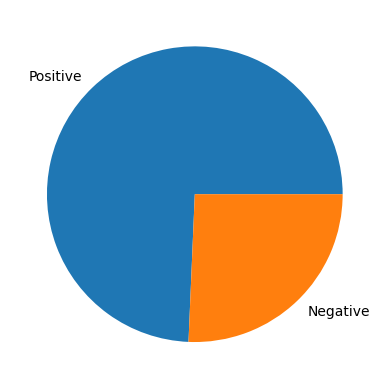

In [78]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

### Handle inbalance Dataset

In [79]:
!pip install imbalanced-learn

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9418, 1145) (9418,)


In [82]:
y_train_smote.value_counts()

label
0    4709
1    4709
Name: count, dtype: int64

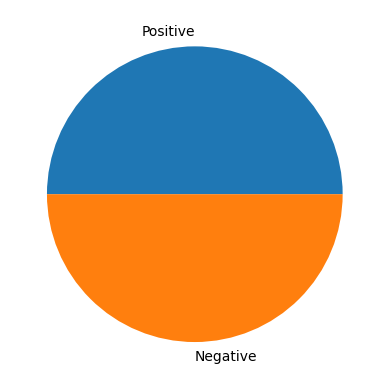

In [83]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

In [84]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9418, 1145), dtype=float32)

In [85]:
y_train_smote

0       0
1       0
2       0
3       1
4       1
       ..
9413    1
9414    1
9415    1
9416    1
9417    1
Name: label, Length: 9418, dtype: int64

In [86]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [87]:
y_test

3343    0
4320    1
4505    0
5338    0
3466    0
       ..
2417    1
1718    0
5622    0
7189    1
2594    0
Name: label, Length: 1584, dtype: int64

## Model Training & Evoluation

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [91]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)

    print(f'Training Scores : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)

    print(f'Testing Scores : \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [97]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores : 
	Accuracy = 0.942
	Precision = 0.918
	Recall = 0.97
	F1-Score = 0.943
Testing Scores : 
	Accuracy = 0.866
	Precision = 0.69
	Recall = 0.847
	F1-Score = 0.76


### Naive Bayers

In [98]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores : 
	Accuracy = 0.905
	Precision = 0.869
	Recall = 0.955
	F1-Score = 0.91
Testing Scores : 
	Accuracy = 0.862
	Precision = 0.664
	Recall = 0.92
	F1-Score = 0.771


### Decision Tree

In [99]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores : 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores : 
	Accuracy = 0.833
	Precision = 0.672
	Recall = 0.662
	F1-Score = 0.667


### Random Forest 

In [100]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores : 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores : 
	Accuracy = 0.87
	Precision = 0.762
	Recall = 0.704
	F1-Score = 0.732


### Support vector machine

In [102]:
svm = SVC()

svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores : 
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.997
	F1-Score = 0.979
Testing Scores : 
	Accuracy = 0.876
	Precision = 0.723
	Recall = 0.825
	F1-Score = 0.77


In [103]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)